Grupo: Jaime Mendoza, Felipe Robalino, Juan J. Miño. 

Ejercicio: Construya un camino aleatorio discreto, con las siguientes condiciones para cada paso:
Genere al azar de manera uniforme una de las direcciones posibles (de las 10 mostradas en la figura abajo):

- Utilice el generador aleatorio de numpy, use numpy.random.randint(10), para generar una de las 10 posiciones posibles

- Note que el tamaño de paso es de 1. 

- Puede auxiliarse usando coordenadas polares (ángulos arriba, y radio 1). 
- O generar el paso (en línea recta) correspondiente de tamaño 1.

- Con la semilla np.random.seed(1492) debería obtener el siguiente resultado, para 10 pasos.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import math
from tqdm.notebook import tqdm, trange

In [9]:
def get_path(seed=1492, N=10, xlimit=(-5,3), linea='o--', direcciones=10):
    angulo = 360/direcciones

    np.random.seed(seed)
    nums = [np.random.randint(direcciones) for i in range(N)]
    
    angulos = [(x*angulo)*math.pi/180 for x in nums]
    x_coor = [math.cos(angulo) for angulo in angulos]
    y_coor = [math.sin(angulo) for angulo in angulos]
    c_x = [0.]
    c_y = [0.]
    for x, y in zip(x_coor, y_coor):
        c_x.append(c_x[-1] + x)
        c_y.append(c_y[-1] + y)
        
    plt.plot(c_x, c_y, linea)
    plt.xlim(xlimit)

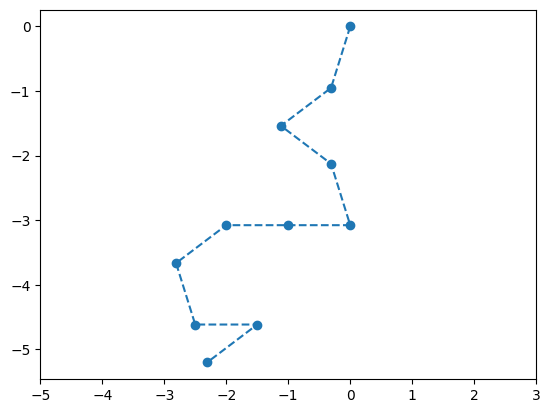

In [10]:
# Con 10 pasos
get_path()

Con dicha semilla y 1000 pasos (30%):

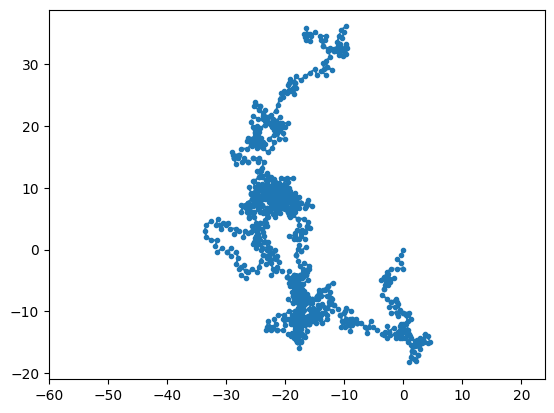

In [11]:
# Con 1000 pasos
get_path(N=1000, xlimit=(-60,24), linea='.--')

Responda (70%): cuál es la probabilidad de que este camino regrese al origen. 

In [6]:
def get_origin_probability(iteraciones=1000, pasos = 100000):
    llego=[]
    for _ in range(iteraciones):

        nums = [np.random.randint(10) for i in range(pasos)]
        angulos = [(x*36)*math.pi/180 for x in nums]
        
        x_coor = [math.cos(angulo) for angulo in angulos]
        y_coor = [math.sin(angulo) for angulo in angulos]
        c_x = [0.]
        c_y = [0.]
        for x, y in zip(x_coor, y_coor):
            c_x.append(c_x[-1] + x)
            c_y.append(c_y[-1] + y)
        c_x_r = np.round(c_x, 4)
        c_y_r = np.round(c_y, 4)

        x_0, y_0 = np.where(c_x_r == 0.0)[0], np.where(c_y_r == 0.0)[0]

        origenes = []
        for x, y in zip(x_0, y_0):
            if x == y:
                origenes.append(x)

        llego.append(any(origenes))

    return len(np.where(llego)[0])/iteraciones

In [30]:
probabilidades = []
for pasos in ([100, 500, 1000, 2000, 3000, 4000, 10000]):
    print(f'Pasos: {pasos}', end=' ')
    probabilidad = get_origin_probability(pasos=pasos)
    print(f'Probabilidad: {probabilidad}')
    probabilidades.append(probabilidad)
probabilidad = np.mean(probabilidades)
print(probabilidad)

Pasos: 100 Probabilidad: 0.101
Pasos: 500 Probabilidad: 0.102
Pasos: 1000 Probabilidad: 0.102
Pasos: 2000 Probabilidad: 0.099
Pasos: 3000 Probabilidad: 0.103
Pasos: 4000 Probabilidad: 0.088
Pasos: 10000 Probabilidad: 0.113
0.10114285714285713


Para resolver la probabilidad de que regrese al origen: se realizaron siete simulaciones de mil iteraciones cada una, donde se verificaba en cada iteración si es que se regresaba al origen (0,0). Si es que lo hacía, entonces se guarda un valor true en la lista de orígenes, de la cual luego se sacaba el porcentaje de trues (llegadas) vs. falses (no llegadas). En las siete simulaciones se puede ver que la probabilidad está cercana al 10%, siendo el promedio de las mismas 10.11%. 

Probando la teoría: la probabilidad de la solución parecería apegada a la teoría, ya que nos dimos cuenta de que usualmente cuando se regresa al origen es en el paso 2, o en pasos tempranos. En dicho paso se tiene una probabilidad del 10% de tomar el paso contrario al que se dio previamente y volver al origen. Es por eso que decidimos probar si esto funcionaba con diferentes cantidades de direcciones, para lo cual se probó con los siguientes valores: 

In [26]:
def get_origin_probability_direccion(iteraciones=1000, pasos = 100000, direccion=10):
    llego=[]
    for _ in range(iteraciones):
        anguloDireccion = 360/direccion
        nums = [np.random.randint(direccion) for i in range(pasos)]
        angulos = [(x*anguloDireccion)*math.pi/180 for x in nums]
        
        x_coor = [math.cos(angulo) for angulo in angulos]
        y_coor = [math.sin(angulo) for angulo in angulos]
        c_x = [0.]
        c_y = [0.]
        for x, y in zip(x_coor, y_coor):
            c_x.append(c_x[-1] + x)
            c_y.append(c_y[-1] + y)
        c_x_r = np.round(c_x, 4)
        c_y_r = np.round(c_y, 4)

        x_0, y_0 = np.where(c_x_r == 0.0)[0], np.where(c_y_r == 0.0)[0]

        origenes = []
        for x, y in zip(x_0, y_0):
            if x == y:
                origenes.append(x)

        llego.append(any(origenes))

    return len(np.where(llego)[0])/iteraciones

 Direcciones: 10, Pasos: 1000 Probabilidad: 0.108
 Direcciones: 15, Pasos: 1000 Probabilidad: 0.01
 Direcciones: 20, Pasos: 1000 Probabilidad: 0.037
 Direcciones: 25, Pasos: 1000 Probabilidad: 0.0
 Direcciones: 30, Pasos: 1000 Probabilidad: 0.041
 Direcciones: 35, Pasos: 1000 Probabilidad: 0.0
 Direcciones: 40, Pasos: 1000 Probabilidad: 0.025
 Direcciones: 45, Pasos: 1000 Probabilidad: 0.0
 Direcciones: 50, Pasos: 1000 Probabilidad: 0.014


<BarContainer object of 9 artists>

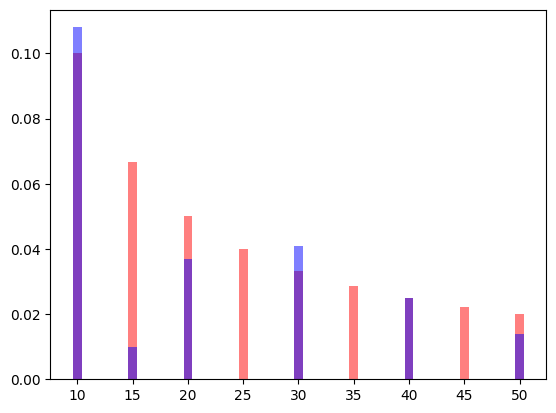

In [40]:
probabilidades = []
for direcciones in ([10,15,20,25,30,35,40,45,50,]):
        print(f' Direcciones: {direcciones}, Pasos: 1000', end=' ')
        probabilidad = get_origin_probability_direccion(pasos=1000, direccion=direcciones)
        print(f'Probabilidad: {probabilidad}')
        probabilidades.append(probabilidad)
teoria = [10,15,20,25,30,35,40,45,50] 
probTeoria = [1/i for i in teoria]
simulacion = [10,15,20,25,30,35,40,45,50]
probSimulacion = probabilidades
plt.bar(teoria,probTeoria, color='red', alpha=0.5)
plt.bar(simulacion,probSimulacion, color='blue', alpha=0.5)

Conclusión: con estas simulaciones se puede comprobar que la teoría se asemeja a la práctica siempre y cuando el valor de las direcciones sea par. Esto se da debido a la distribución de las direcciones, como el paso que volvía al origen, usualmente, era el inicial, si se tiene una distribución de direcciones impar, no existen direcciones contrarias, y por ende, es imposible que el camino regrese al origen en los primeros pasos. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=459990e1-1a9c-4a89-8b81-56466a98122d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>